In [ ]:
!pip3 install pyamg

In [33]:
import pyamg
import numpy as np
import matplotlib.pyplot as plt
from pyamg.vis.vis_coarse import vis_splitting

multilevel_solver
Number of Levels:     4
Operator Complexity:  2.085
Grid Complexity:      1.667
Coarse Solver:        'pinv2'
  level   unknowns     nonzeros
    0          225         1065 [47.95%]
    1          113          897 [40.39%]
    2           30          222 [10.00%]
    3            7           37 [ 1.67%]

  (0, 0)	1.0
  (1, 0)	0.25
  (1, 1)	0.25
  (1, 8)	0.25
  (2, 1)	1.0
  (3, 1)	0.25
  (3, 2)	0.25
  (3, 9)	0.25
  (4, 2)	1.0
  (5, 2)	0.25
  (5, 3)	0.25
  (5, 10)	0.25
  (6, 3)	1.0
  (7, 3)	0.25
  (7, 4)	0.25
  (7, 11)	0.25
  (8, 4)	1.0
  (9, 4)	0.25
  (9, 5)	0.25
  (9, 12)	0.25
  (10, 5)	1.0
  (11, 5)	0.25
  (11, 6)	0.25
  (11, 13)	0.25
  (12, 6)	1.0
  :	:
  (212, 106)	1.0
  (213, 99)	0.25
  (213, 106)	0.25
  (213, 107)	0.25
  (214, 107)	1.0
  (215, 100)	0.25
  (215, 107)	0.25
  (215, 108)	0.25
  (216, 108)	1.0
  (217, 101)	0.25
  (217, 108)	0.25
  (217, 109)	0.25
  (218, 109)	1.0
  (219, 102)	0.25
  (219, 109)	0.25
  (219, 110)	0.25
  (220, 110)	1.0
  (221, 103)	0.25

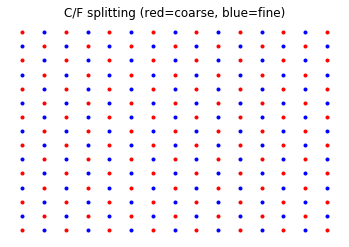

In [96]:
# Define problem
n=16
sten = pyamg.gallery.diffusion.diffusion_stencil_2d(epsilon=1.0, theta=0.0, type='FD')
A = pyamg.gallery.stencil_grid(sten, (n-1,n-1), format='csr')

# meshgrid for locations of points on fine grid
X, Y = np.meshgrid(np.arange(1.0/n,1.0,1.0/n),np.arange(1.0/n,1.0,1.0/n))
X = X.reshape((X.size,1))
Y = Y.reshape((Y.size,1))
V = []
V.append(np.concatenate((X,Y),axis=1))

# Construct Ruge-Stüben AMG hierarchy using PyAMG
ml = pyamg.ruge_stuben_solver(A, keep=True)
print(ml) # Look at complexity of coarse-grid operators
# print(ml.levels[0].P)

# Set a right-hand side and do a solve
b = A * np.ones(A.shape[0])
residuals = []
x = ml.solve(b, tol=1e-6, residuals=residuals)

# Print number of iterations and final relative residual
print(len(residuals)-1)
print(residuals[-1]/residuals[0])

# Get point locations on coarser grids
for level in range(len(ml.levels)-1):
# for level in range(1):
    split = ml.levels[level].splitting
    C_pts = []
    for point in range(len(split)):
        if split[point]:
            C_pts.append(point)
    V.append(V[-1][C_pts,:])

# Visualize the C/F splitting on some level
level = 0
vis_splitting(Verts=V[level],splitting=ml.levels[level].splitting,output='matplotlib')